### PCA Implementation

#### PCA Implementation in Python manually


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance = None
    
    def fit(self, X):
        # Step 1: Standardize the data (subtract the mean)
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Step 2: Compute the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Step 3: Compute the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Step 4: Sort the eigenvalues and corresponding eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Step 5: Select the top n_components
        self.components = eigenvectors[:, :self.n_components]

        # Calculate explained variance
        total_variance = np.sum(eigenvalues)
        self.explained_variance = eigenvalues[:self.n_components] / total_variance

    def transform(self, X):
        # Step 6: Project the data onto the selected components
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def plot_explained_variance(self):
        # Create labels for each principal component
        labels = [f'PCA{i+1}' for i in range(self.n_components)]

        # Create a bar plot for explained variance
        plt.figure(figsize=(8, 6))
        plt.bar(range(1, self.n_components + 1), self.explained_variance, alpha=0.7, align='center', color='blue', tick_label=labels)
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Explained Variance by Principal Components')
        plt.show()


In [3]:
# create simulated data for analysis
np.random.seed(42)
# Generate a low-dimensional signal
low_dim_data = np.random.randn(100, 4)

# Create a random projection matrix to project into higher dimensions
projection_matrix = np.random.randn(4, 10)

# Project the low-dimensional data to higher dimensions
high_dim_data = np.dot(low_dim_data, projection_matrix)

# Add some noise to the high-dimensional data
noise = np.random.normal(loc=0, scale=0.5, size=(100, 10))
data_with_noise = high_dim_data + noise
    
X = data_with_noise


In [7]:
# Apply PCA
pca = PCA(n_components=10)
pca.fit(X)
X_transformed = pca.transform(X)

print("Explained Variance:\n", pca.explained_variance)


Explained Variance:
 [0.55405589 0.25223221 0.11137198 0.05298214 0.0064076  0.00625557
 0.00510674 0.00441098 0.00401037 0.00316652]


#### PCA Implementation using Scikit-learn


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
df = pd.read_csv('../../data/data-.csv')

In [25]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [26]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:2])

[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e-01  2.81189987e-01]]


In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(X_pca[:2])

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]]


In [29]:
print("Explained variance:", pca.explained_variance_ratio_)
print("Cumulative:", np.cumsum(pca.explained_variance_ratio_))

Explained variance: [0.44272026 0.18971182]
Cumulative: [0.44272026 0.63243208]


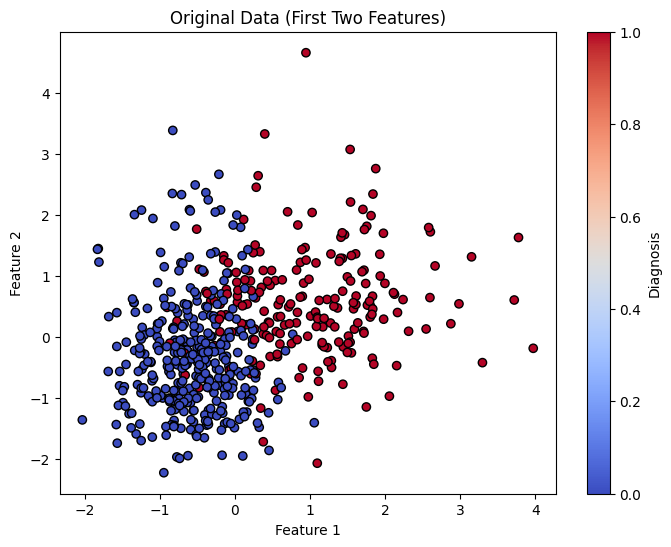

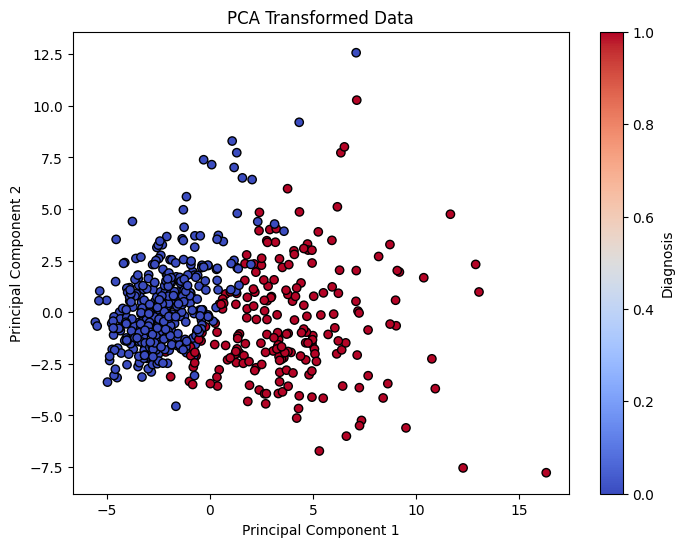

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data (First Two Features)")
plt.colorbar(label="Diagnosis")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformed Data")
plt.colorbar(label="Diagnosis")
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



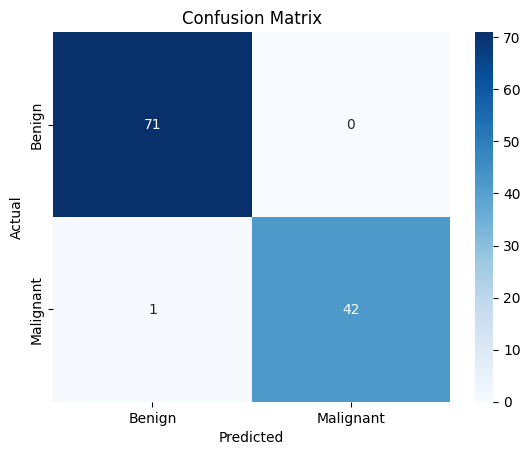

In [32]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
X_reconstructed = pca.inverse_transform(X_pca)
reconstruction_loss = np.mean((X_scaled - X_reconstructed) ** 2)
print(f"Reconstruction Loss: {reconstruction_loss:.4f}")

Reconstruction Loss: 0.3676
